# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
d = pd.read_csv('ccfd.csv')
d

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,01-01-2019 00:00,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,01-01-2019 00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,01-01-2019 00:07,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,21-12-1945,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,01-01-2019 00:09,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,30-08-1967,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,01-01-2019 00:21,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",02-08-1967,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,1
5,01-01-2019 00:22,Kunze Inc,grocery_pos,90.22,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,03-12-1966,95826e3caa9e0b905294c6dae985aec1,19.560013,-156.045889,0
6,01-01-2019 00:22,"""Nitzsche, Kessler and Wol""",shopping_pos,4.02,Valentine,NE,42.8062,-100.6215,4005,Network engineer,15-03-1945,20490f3f0966ce74b4aaba8dc2c4ed52,42.475590,-101.265846,0
7,01-01-2019 00:22,"""Kihn, Abernathy and Douglas""",shopping_net,3.66,Westfir,OR,43.7575,-122.4810,597,Forensic psychologist,19-05-1961,870c92b288a974a2faf1f24b05c27e33,44.278191,-121.815161,1
8,01-01-2019 00:31,Ledner-Pfannerstill,gas_transport,102.13,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0
9,01-01-2019 00:34,Stracke-Lemke,grocery_pos,83.07,Conway,WA,48.3400,-122.3456,85,"""Research officer, political party""",01-09-1984,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0


In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  49 non-null     object 
 1   merchant               49 non-null     object 
 2   category               49 non-null     object 
 3   amt                    49 non-null     float64
 4   city                   49 non-null     object 
 5   state                  49 non-null     object 
 6   lat                    49 non-null     float64
 7   long                   49 non-null     float64
 8   city_pop               49 non-null     int64  
 9   job                    49 non-null     object 
 10  dob                    49 non-null     object 
 11  trans_num              49 non-null     object 
 12  merch_lat              49 non-null     float64
 13  merch_long             49 non-null     float64
 14  is_fraud               49 non-null     int64  
dtypes: float

In [24]:
d.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

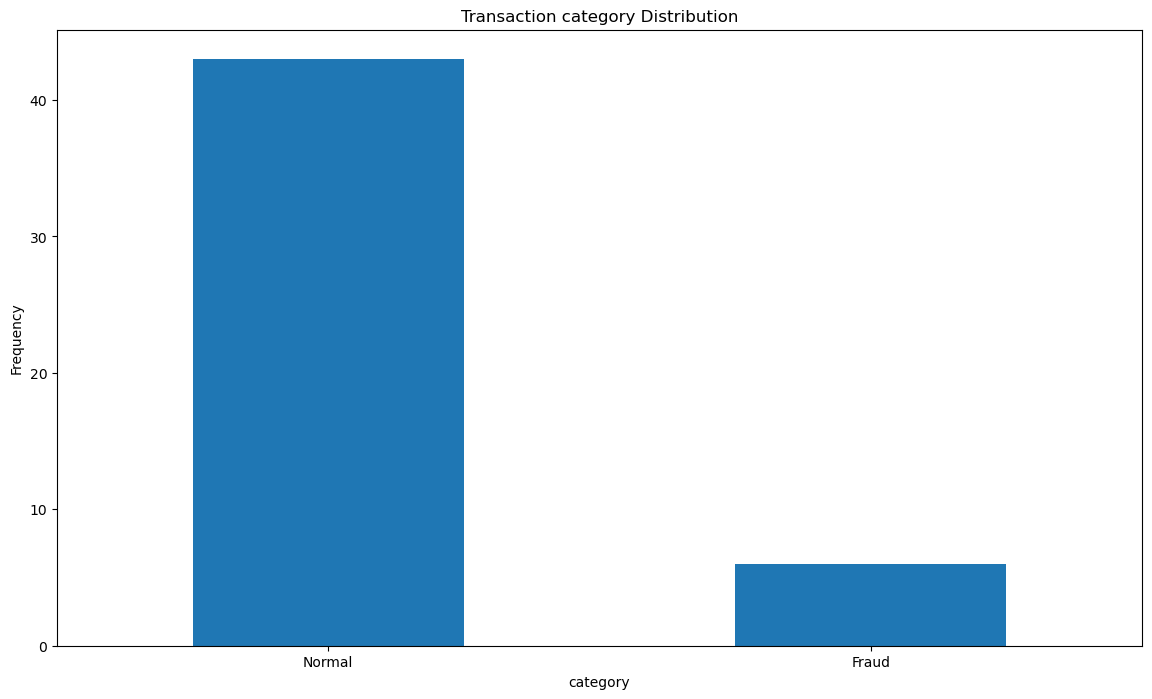

In [3]:
count_classes = pd.value_counts(d['is_fraud'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction category Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("category")

plt.ylabel("Frequency")

In [30]:
fraud = d[d['is_fraud']==1]

normal = d[d['is_fraud']==0]

In [31]:
print(fraud.shape,normal.shape)

(6, 15) (43, 15)


In [32]:
fraud.amt.describe()

count      6.000000
mean      56.096667
std       83.420564
min        2.760000
25%        4.457500
50%       18.020000
75%       65.895000
max      215.990000
Name: amt, dtype: float64

In [33]:
normal.amt.describe()

count      43.000000
mean      106.292558
std       165.655013
min         1.420000
25%        25.415000
50%        70.530000
75%       110.315000
max      1055.470000
Name: amt, dtype: float64

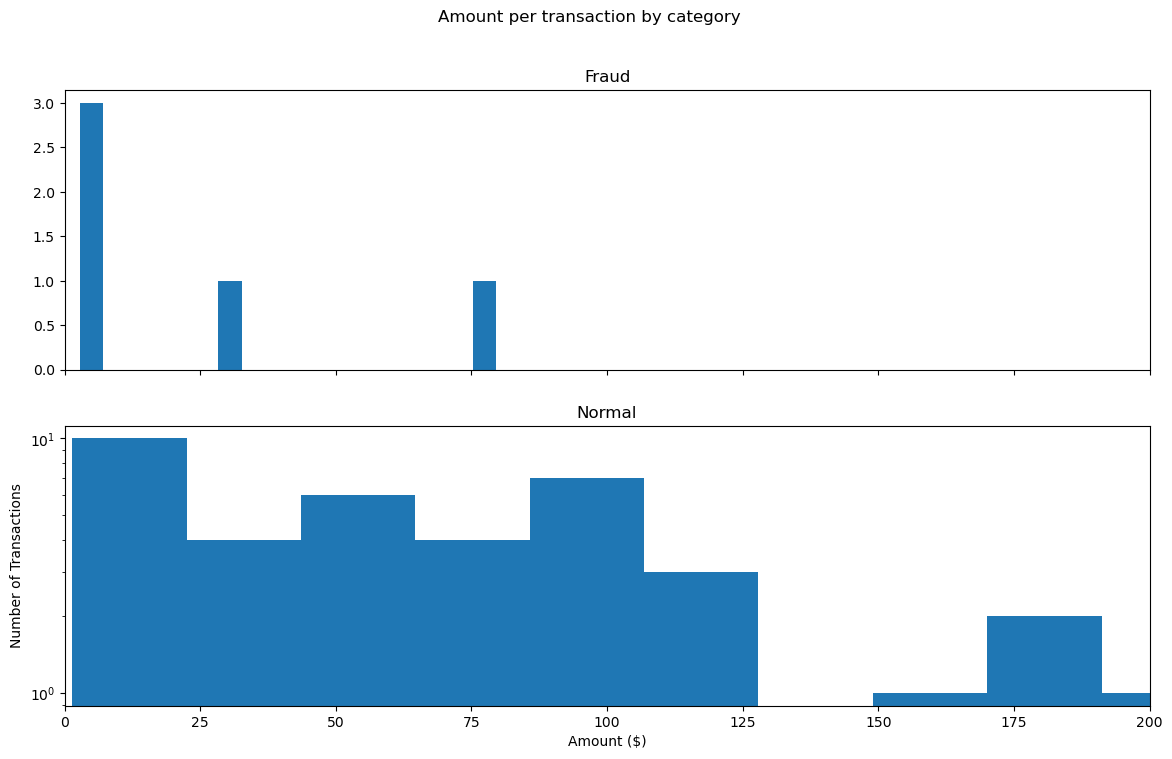

In [51]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by category')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 200))
plt.yscale('log')
plt.show();

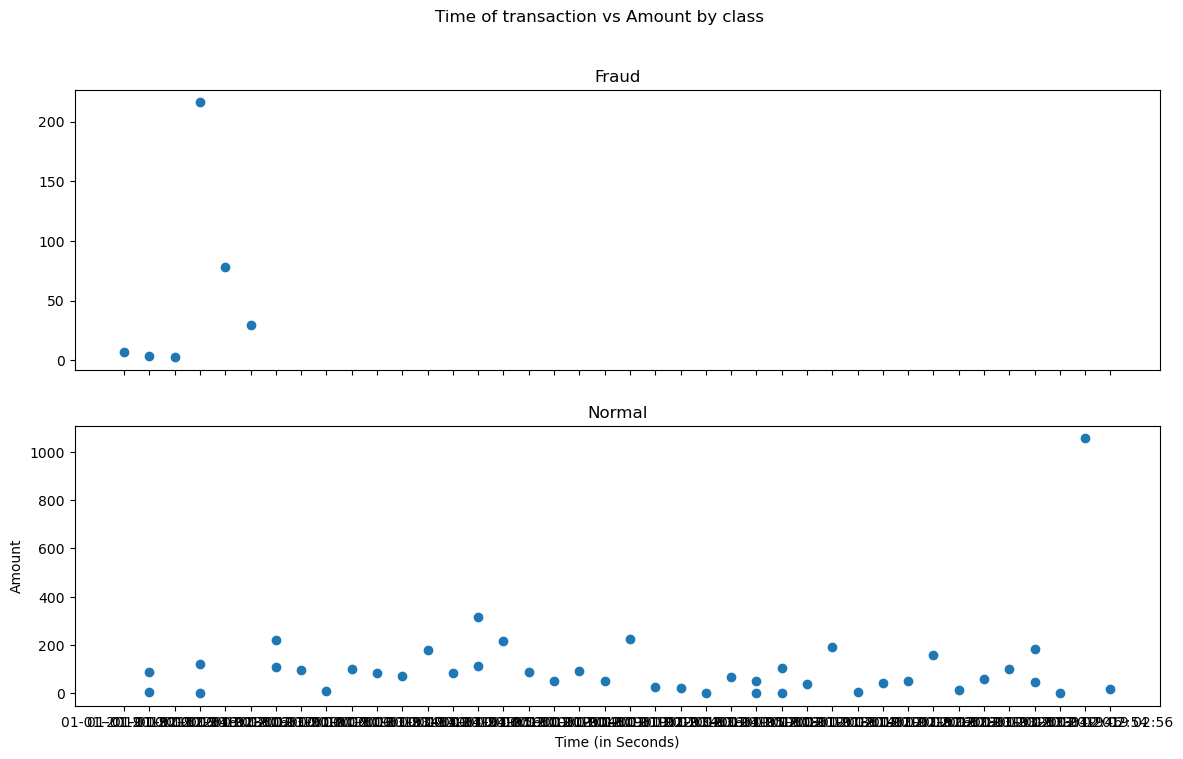

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.trans_date_trans_time, fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(normal.trans_date_trans_time, normal.amt)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [36]:
data1= d.sample(frac = 0.1,random_state=1)

data1.shape

(5, 15)

In [40]:
Fraud = data1[data1['is_fraud']==1]

Valid = data1[data1['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))


In [43]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0
Fraud Cases : 6
Valid Cases : 5


C:\Users\vedas\AppData\Local\Temp\ipykernel_38028\811054247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data1.corr()


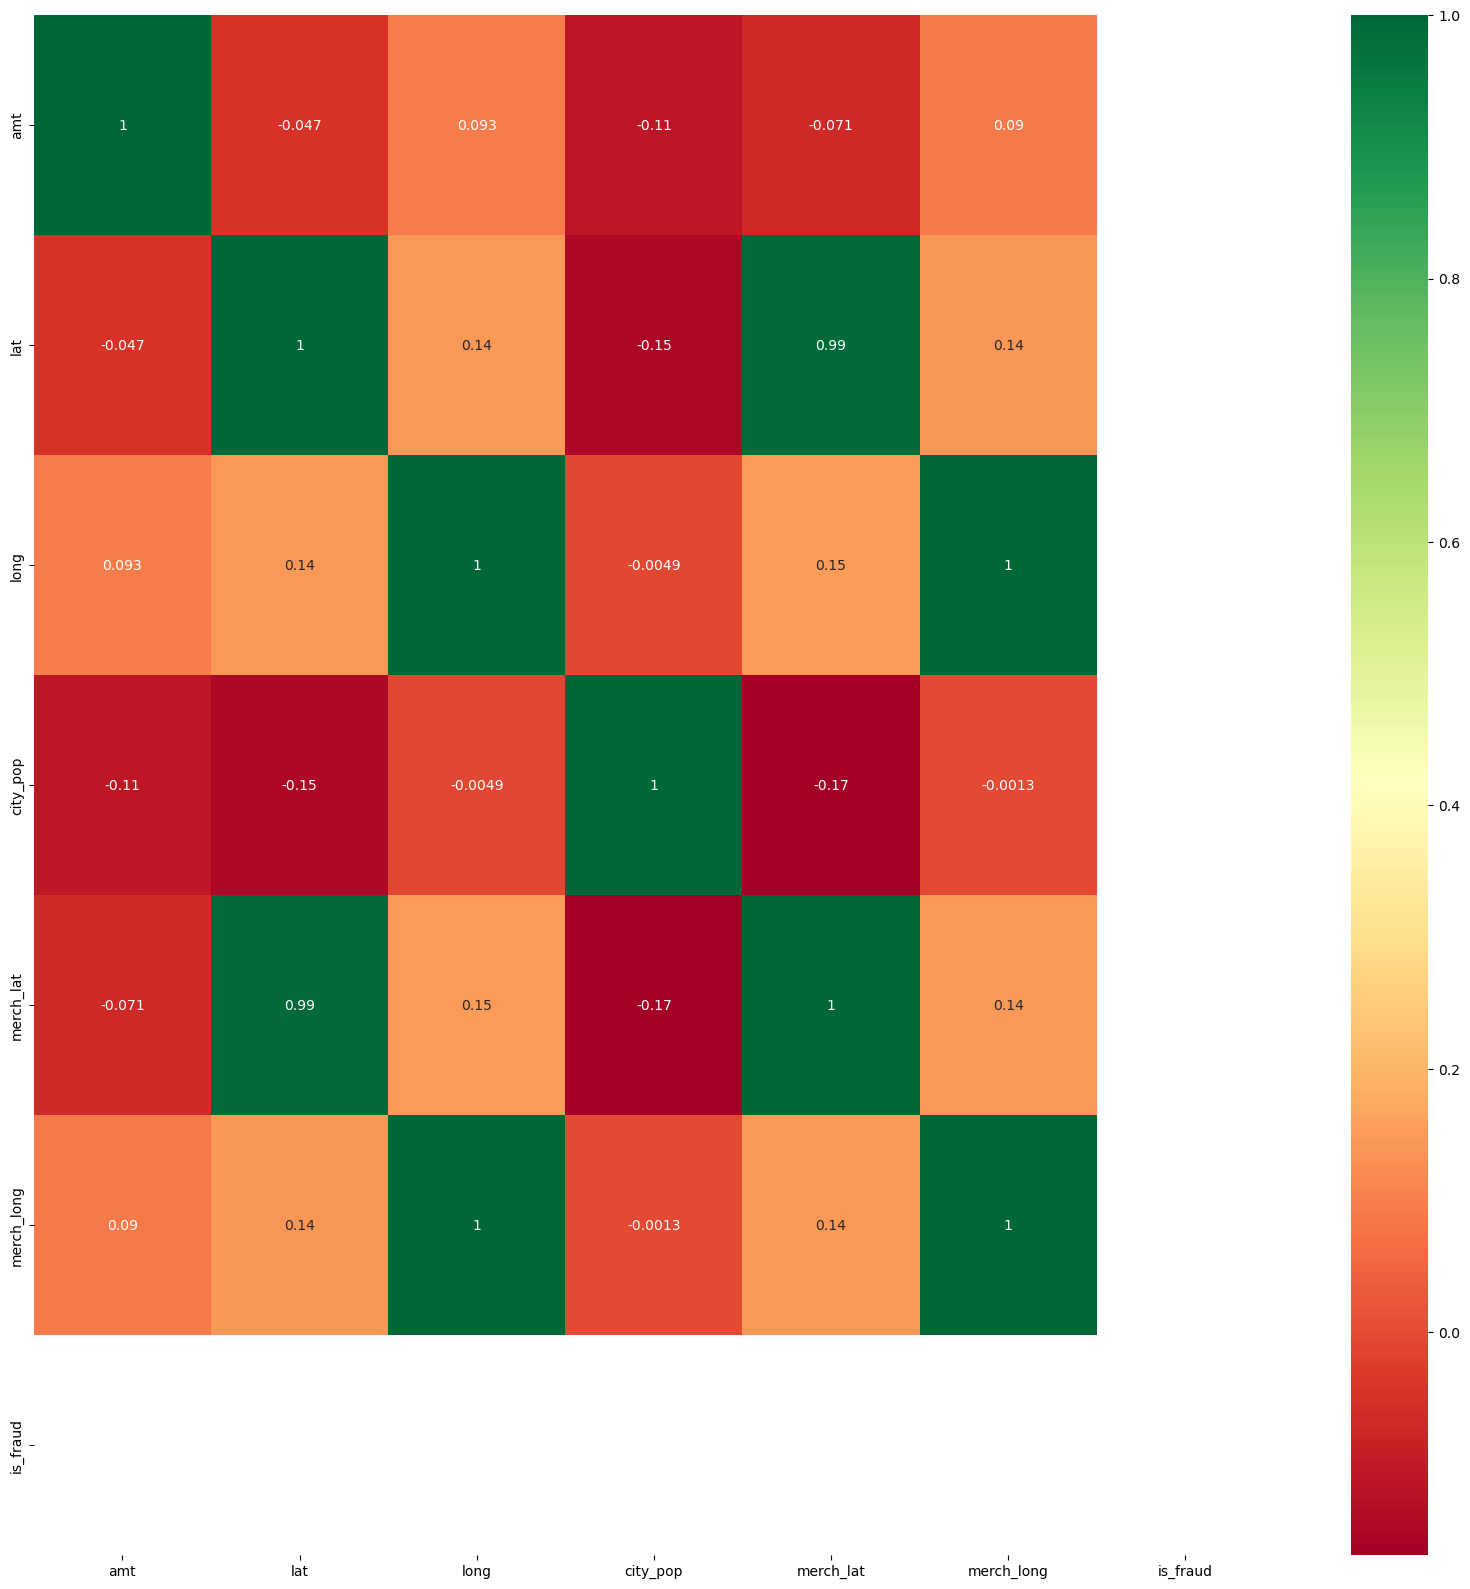

In [44]:
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [47]:
columns = data1.columns.tolist()

columns = [c for c in columns if c not in ["category"]]

target = "category"

state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(5, 14)
(5,)
